# Overview
The notebook is the exercises of the Python Programming for Finance tutorial at https://www.pythonprogramming.net/getting-stock-prices-python-programming-for-finance/

Fixed Yahoo Finance:
https://github.com/ranaroussi/fix-yahoo-finance

# Exercises

## Setup

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import fix_yahoo_finance

%matplotlib inline
style.use('ggplot')

## Grab Historical Stock Data from Yahoo Finance

In [2]:
start = "2000-01-01"
end = "2016-12-31"

df = web.get_data_yahoo('TSLA', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 downloaded

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## Save data as CSV file

In [3]:
df.to_csv('data/TSLA.csv')

## Load data from CSV file

In [4]:
df2 = pd.read_csv('data/TSLA.csv', parse_dates=True, index_col=0)
df2.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,208.000000,213.449997,207.710007,213.339996,213.339996,4662900
2016-12-27,214.880005,222.250000,214.419998,219.529999,219.529999,5915700
2016-12-28,221.529999,223.800003,217.199997,219.740005,219.740005,3782500
2016-12-29,218.559998,219.199997,214.119995,214.679993,214.679993,4045000
2016-12-30,216.300003,217.500000,211.679993,213.690002,213.690002,4642600


## Render graph

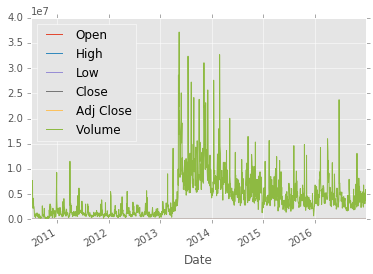

In [5]:
df.plot()

df['Adj Close'].plot()

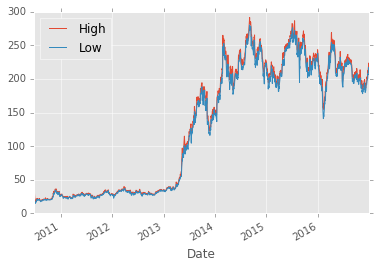

In [7]:
df[['High','Low']].plot()

## Simple Moving Average

In [13]:
df['100sma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,100sma
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,23.860000
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,23.226666
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,22.220000
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,20.998000


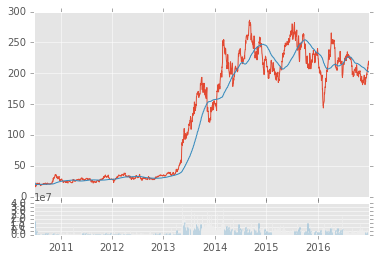

In [19]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100sma'])
ax2.bar(df.index, df['Volume'])
plt.show()